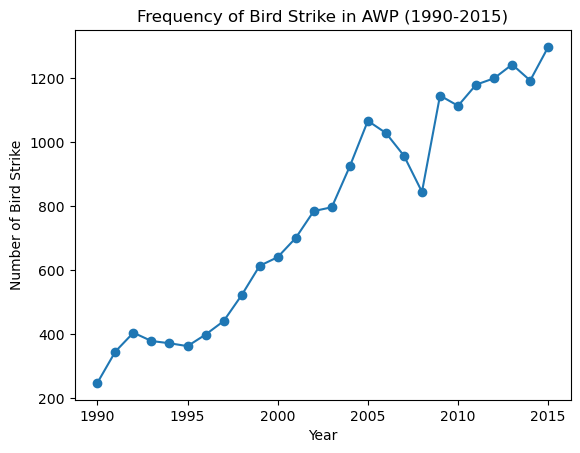

In [25]:
import numpy as np
from sklearn.linear_model import LinearRegression

#1
#filter data frame
df_awp = dataframe[dataframe['FAAREGION'] == 'AWP']
df_awp_year = df_awp[(df_awp['INCIDENT_YEAR'] >= 1990) & (df_awp['INCIDENT_YEAR'] <= 2015)]
incidents_by_year = df_awp_year.groupby('INCIDENT_YEAR').size().reset_index(name='Frequency')

#visulization by line graph 
plt.plot(incidents_by_year['INCIDENT_YEAR'], incidents_by_year['Frequency'], marker='o')
plt.title('Frequency of Bird Strike in AWP (1990-2015)')
plt.xlabel('Year')
plt.ylabel('Number of Bird Strike')
plt.show()

As the year increases the general trend is that the incidents of bird strikes also increase. However fro this graph you are also able to tell that it is not completely linear and there are dips and peaks throughout the graph suggesting that althought year might be on conributing factor it is not the only one. At around 2009 there is a sigificant dip suggesting something else may have occured that year to contribute to the decrease of bird strikes.

In [18]:
#2 
#Training data
X_train = incidents_by_year['INCIDENT_YEAR'].values.reshape(-1, 1)
y_train = incidents_by_year['Frequency'].values
#linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
#r-squared value
r_squared = model.score(X_train, y_train)
print("r_squared value:", r_squared)

r_squared value: 0.9519438408103288


The r-squared value helps to indicates the proportion of variance in the incident frequency by year. Values that are closer to 1 suggest a better fit, whereas lower values indicate a weak linear relationship. Because the value is 0.95 it suggets a strong linear relationship between bird strikes a years.

In [19]:
#predctions for 2016 and 2017
X_predict_year = np.array([2016, 2017]).reshape(-1, 1)
predictions_16_17 = model.predict(X_predict_year)

In [20]:
#actual for 2016 and 2017
df_awp_16_17 = df_awp[(df_awp['INCIDENT_YEAR'] >= 2016) & (df_awp['INCIDENT_YEAR'] <= 2017)]
actual_16_17 = df_awp_16_17.groupby('INCIDENT_YEAR').size().reset_index(name='Frequency')

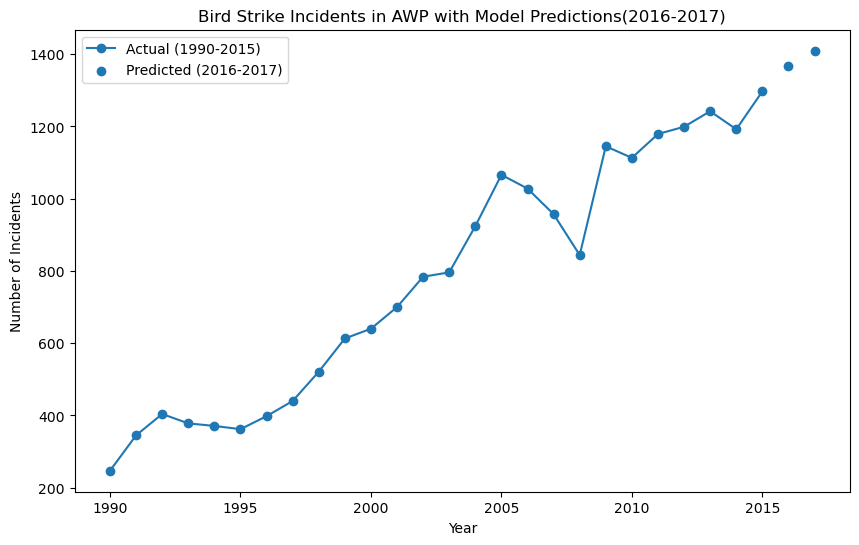

In [21]:
#line graph with historical data + predicions
plt.figure(figsize=(10,6))
plt.plot(incidents_by_year['INCIDENT_YEAR'], incidents_by_year['Frequency'], marker='o', label='Actual (1990-2015)')
plt.scatter([2016, 2017], predictions_16_17, label='Predicted (2016-2017)', zorder=5)
plt.title('Bird Strike Incidents in AWP with Model Predictions(2016-2017)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend()
plt.show()

Looking at the model prediction for 2016 and 2017 you are able to see that it just increases linearly as based off our r value there was a significant correlation between year and number of incidents.

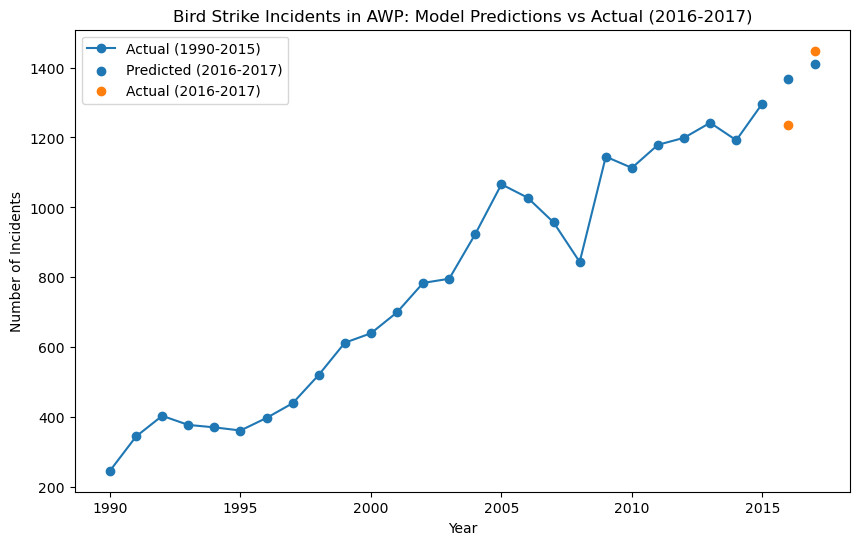

In [24]:
# #line graph with historical data + predicions compared to actual
plt.figure(figsize=(10,6))
plt.plot(incidents_by_year['INCIDENT_YEAR'], incidents_by_year['Frequency'], marker='o', label='Actual (1990-2015)')
plt.scatter([2016, 2017], predictions_16_17, label='Predicted (2016-2017)', zorder=5)
plt.scatter(actual_16_17['INCIDENT_YEAR'], actual_16_17['Frequency'], label='Actual (2016-2017)', zorder=5)
plt.title('Bird Strike Incidents in AWP: Model Predictions vs Actual (2016-2017)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend()
plt.show()

When our predicted values are compared to the real values you are able to tell that our model is not extremly accurate as there is a lot more factors that contribute to incident rather than just year. in 2016 it takes a fall and decreases, our model would have neveer been able to predict that as the data our model was trained off only suggested increases and never given factors that would lead to decreased incidents. Furthermore our 2017 value was a lot more accurate but the actual value was slightly higher in the number of incidents that our model had originally predicted.

In [23]:
#predictions for 2018 through to 2020
X_predict_18_20 = np.array([2018, 2019, 2020]).reshape(-1, 1)
predictions_18_20 = model.predict(X_predict_18_20)
print(predictions_18_20)

[1453.19008547 1496.8574359  1540.52478632]


Based off the data that our predictive model was trained off of it can only assume that as the year increases so does the incident rate not taking into account other factors that might have contributed to the historical data. A simple linear regression model, which is limited in features and does not include information about all factors that influence the frequency of bird strikes may result in inaccurate predictions. However based off the information provided to the model we are able to deduce that as time carries on and the year increases do will the number of incidents. I would argue our model is not very reliable as year cannot be the only factor that makes a prediction. As seen from our 2016 prediction our model was extremely off and would never have predicted a drop in incidents. A strong assumption should be held as many factors—such as changes in airport operations, environmental factors, or wildlife behavior—can alter the trend. As a result, predictions for 2018-2020 should be interpreted with caution, as the model’s reliability decreases when predicting outside the range of its training data.

## Question 6
Summarize the overall analysis for questions 1 through 5 and share THREE (3) key findings.

The exploratory analysis reveals a rising trend in bird strike incidents, with a sharp increase in 2023, likely due to increased air traffic, migratory patterns, or improved reporting. Texas, Florida, and California report the most incidents, while major airports like Denver and Dallas/Fort Worth also see high frequencies. Many strikes involve unidentified bird species, though mourning doves and barn swallows are common. Aircraft damage occurs most often during approach and landing roll, and incidents peak between July and October. These insights highlight the need for improved wildlife management strategies at high-risk locations and during critical flight phases.

The analysis explores relationships between aircraft height, speed, flight phase, and bird strike damage. A scatterplot shows no significant correlation between aircraft height and speed (p > 0.05). A histogram comparing approach and landing roll speeds indicates some overlap, with a t-test (p ≈ 0.058) suggesting a weak but insignificant difference. A chi-square test (p = 0.60) finds no strong association between flight phase and aircraft damage, as most strikes cause no damage. A bar chart confirms that damage proportions remain consistent across phases. Boxplots and ANOVA results (p = 0.076) indicate no significant speed differences across flight phases, suggesting that neither speed nor flight phase strongly impacts bird strike outcomes.

The analysis explores relationships between aircraft height, speed, flight phase, and bird strike damage. A scatterplot shows no significant correlation between aircraft height and speed (p > 0.05). A histogram comparing approach and landing roll speeds indicates some overlap, with a t-test (p ≈ 0.058) suggesting a weak but insignificant difference. A chi-square test (p = 0.60) finds no strong association between flight phase and aircraft damage, as most strikes cause no damage. A bar chart confirms that damage proportions remain consistent across phases. Boxplots and ANOVA results (p = 0.076) indicate no significant speed differences across flight phases, suggesting that neither speed nor flight phase strongly impacts bird strike outcomes.

3 Key findings:
- Bird Strike Incidents Have Increased Over Time but with Fluctuations. There is a general upward trend in bird strike incidents, the pattern is not strictly linear. It has significant deviations, such as the dip in 2009 and the sharp rise in 2023. Factors beyond time—such as changes in air traffic, wildlife behavior, or reporting improvements—play a role in incident frequency.

- Flight Phase and Speed Do Not Strongly Impact Bird Strike Outcomes. From the Statistical tests (Chi-Square, T-test, and ANOVA) shows there is no significant relationship between flight phase and aircraft damage, and aircraft speeds remain relatively consistent across different phases of flight. This suggests that bird strikes can happen at any phase, and damage is not significantly influenced by flight conditions.

- Simple Linear Models Are Limited in Predicting Bird Strikes. The (R² = 0.95) shows a strong correlation between year and incident frequency but fails to capture drops in incidents, such as in 2016. More complex models incorporating environmental, operational, and behavioral factors are keys for accurate forecasting.